In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# data_path = '/content/drive/My Drive/Thesis/heart.csv'
data_path = 'CVD_dataset.csv'

In [8]:
data = pd.read_csv(data_path)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Cardio_Disease
0,Poor,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,No
1,Very Good,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,Yes
2,Very Good,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,No
3,Poor,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,Yes
4,Good,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,No


In [9]:
data = pd.read_csv(data_path)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Cardio_Disease
0,Poor,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,No
1,Very Good,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,Yes
2,Very Good,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,No
3,Poor,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,Yes
4,Good,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,No


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Skin_Cancer                   308854 non-null  object 
 3   Other_Cancer                  308854 non-null  object 
 4   Depression                    308854 non-null  object 
 5   Diabetes                      308854 non-null  object 
 6   Arthritis                     308854 non-null  object 
 7   Sex                           308854 non-null  object 
 8   Age_Category                  308854 non-null  object 
 9   Height_(cm)                   308854 non-null  int64  
 10  Weight_(kg)                   308854 non-null  float64
 11  BMI                           308854 non-null  float64
 12  Smoking_History               308854 non-nul

In [11]:
data.isnull().sum() # finding is there any null data

General_Health                  0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
Cardio_Disease                  0
dtype: int64

In [12]:
data.nunique() # differnet value in a column

General_Health                     5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
Cardio_Disease                     2
dtype: int64

In [13]:
data.duplicated().sum() # finding is there any duplicate data

np.int64(784)

In [14]:
data_without_duplicates = data.drop_duplicates(keep='first') # delete duplicate values and keep the first one
data_without_duplicates.info() # new data info after merging duplicate data

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308070 non-null  object 
 1   Exercise                      308070 non-null  object 
 2   Skin_Cancer                   308070 non-null  object 
 3   Other_Cancer                  308070 non-null  object 
 4   Depression                    308070 non-null  object 
 5   Diabetes                      308070 non-null  object 
 6   Arthritis                     308070 non-null  object 
 7   Sex                           308070 non-null  object 
 8   Age_Category                  308070 non-null  object 
 9   Height_(cm)                   308070 non-null  int64  
 10  Weight_(kg)                   308070 non-null  float64
 11  BMI                           308070 non-null  float64
 12  Smoking_History               308070 non-null  ob

In [15]:
# copied the actual data into data_count so that if i replace the encoded values that doesn't effect the actual data frame
data_count = data_without_duplicates.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
# Iterate over the columns in the dataset to encode categorical columns
for col in data_without_duplicates.columns:
    if data_without_duplicates[col].dtype == 'object':  # If column is categorical
        data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])

# Check for missing values
if data_without_duplicates.isnull().sum().any():
    print("There are missing values. Handle them before proceeding.")
    # Example: Fill missing values if any
    data_without_duplicates = data_without_duplicates.fillna(method='ffill')

## Showing the risk of having Cardiovascular Diseases depending on the Gender

In [23]:
data_count['Sex'] = data_count['Sex'].replace({
    0 : "Female", 1 : "Male"
})

gender_count = data_count['Sex'].value_counts().sort_values()
print('Number of Total Female and Male')
gender_count

Number of Total Female and Male


Sex
Male      148332
Female    159738
Name: count, dtype: int64

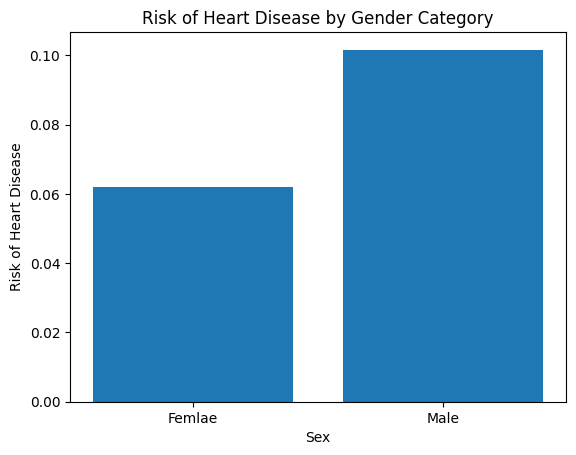

In [24]:
gender_group = data_without_duplicates.groupby('Sex')
risk_by_gender = gender_group['Cardio_Disease'].mean()
gender_group_names = {
   0 : "Femlae", 1 : "Male"
}
plt.bar(gender_group_names.values(), risk_by_gender.values)
plt.xlabel('Sex')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Gender Category')
plt.xticks(rotation=0)
plt.show()

## The chances of having Cardiovascular diseases of differnt age category

In [25]:
data_count['Age_Category'] = data_count['Age_Category'].replace({
     0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older"
})
age_count = data_count['Age_Category'].value_counts().sort_values()
print('Number of People According to their Age (Sorted)')
age_count

Number of People According to their Age (Sorted)


Age_Category
25-29    15456
30-34    18359
18-24    18570
35-39    20554
75-79    20676
45-49    20903
40-44    21532
80+      22227
50-54    25024
55-59    28000
70-74    31063
60-64    32350
65-69    33356
Name: count, dtype: int64

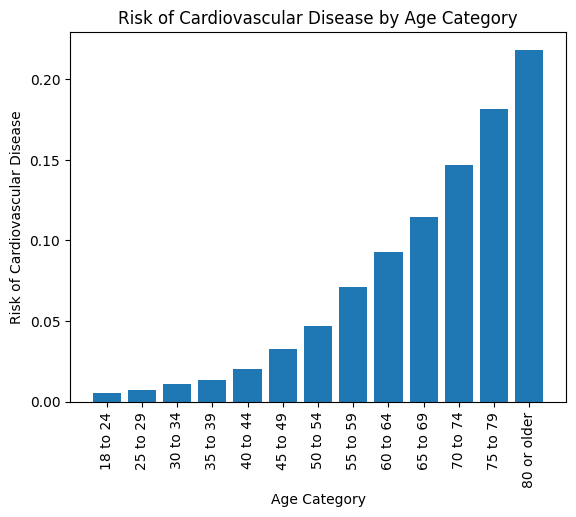

In [27]:
age_group = data_without_duplicates.groupby('Age_Category')
risk_by_age = age_group['Cardio_Disease'].mean()
age_group_names = {
    0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older",
}
plt.bar(age_group_names.values(), risk_by_age.values)
plt.xlabel('Age Category')
plt.ylabel('Risk of Cardiovascular Disease')
plt.title('Risk of Cardiovascular Disease by Age Category')
plt.xticks(rotation=90)
plt.show()

In [28]:
data_without_duplicates.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'Cardio_Disease'],
      dtype='object')

## The chances of having Cardiovascular diseases of differnt General Health

In [29]:
## The chances of having heart diseases of differnt General Health
data_count['General_Health'] = data_count['General_Health'].replace({
    0: "Excellent",
    1: "Fair",
    2: "Good",
    3: "Poor",
    4: "Very Good"
})

general_health_count = data_count['General_Health'].value_counts().sort_values()
print('Number of People According to their General Health (Sorted)')
general_health_count

Number of People According to their General Health (Sorted)


General_Health
Poor          11331
Fair          35800
Excellent     55710
Good          95226
Very Good    110003
Name: count, dtype: int64

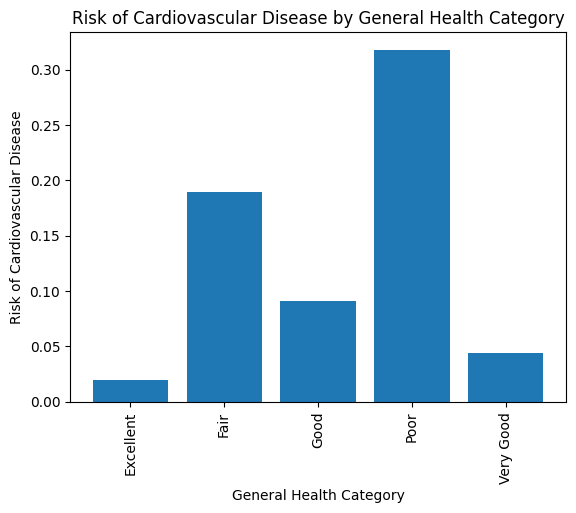

In [30]:
general_health_group = data_without_duplicates.groupby('General_Health')
risk_by_general_health = general_health_group['Cardio_Disease'].mean()
general_health_group_names = {
    0: "Excellent",
    1: "Fair",
    2: "Good",
    3: "Poor",
    4: "Very Good"
}
plt.bar(general_health_group_names.values(), risk_by_general_health.values)
plt.xlabel('General Health Category')
plt.ylabel('Risk of Cardiovascular Disease')
plt.title('Risk of Cardiovascular Disease by General Health Category')
plt.xticks(rotation=90)
plt.show()

## The chances of having Cardiovascular diseases according to their Excercise routine

In [31]:
data_count['Exercise'] = data_count['Exercise'].replace({
    0: "No",
    1: "Yes"
})

excercise_count = data_count['Exercise'].value_counts().sort_values()
print('Number of People According to their Excercise (Sorted)')
excercise_count

Number of People According to their Excercise (Sorted)


Exercise
No      69427
Yes    238643
Name: count, dtype: int64

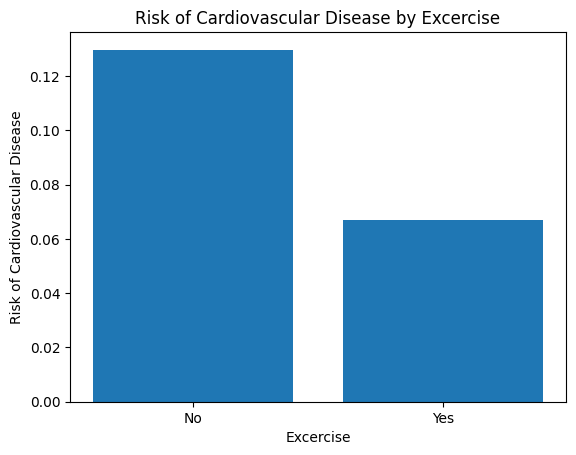

In [32]:
excercise_group = data_without_duplicates.groupby('Exercise')
risk_by_excercise = excercise_group['Cardio_Disease'].mean()
excercise_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(excercise_group_names.values(), risk_by_excercise.values)
plt.xlabel('Excercise')
plt.ylabel('Risk of Cardiovascular Disease')
plt.title('Risk of Cardiovascular Disease by Excercise')
plt.xticks(rotation=0)
plt.show()


## The chances of having Cardiovascular diseases according to their Skin Cancer

In [33]:
data_count['Skin_Cancer'] = data_count['Skin_Cancer'].replace({
    0: "No",
    1: "Yes"
})

skin_cancer_count = data_count['Skin_Cancer'].value_counts().sort_values()
print('Number of People According to their Skin_Cancer (Sorted)')
skin_cancer_count

Number of People According to their Skin_Cancer (Sorted)


Skin_Cancer
Yes     29982
No     278088
Name: count, dtype: int64

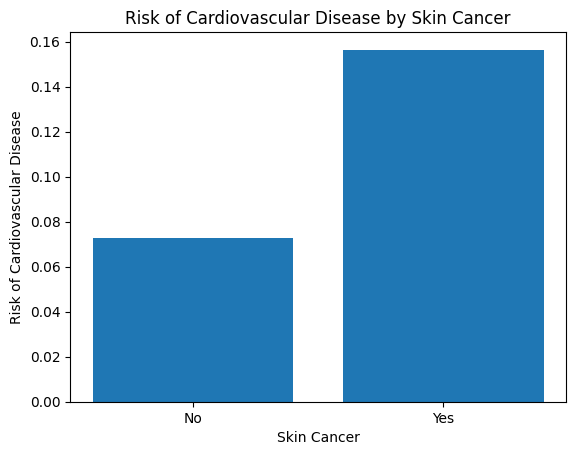

In [34]:
skin_cancer_group = data_without_duplicates.groupby('Skin_Cancer')
risk_by_skin_cancer = skin_cancer_group['Cardio_Disease'].mean()
skin_cancer_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(skin_cancer_group_names.values(), risk_by_skin_cancer.values)
plt.xlabel('Skin Cancer')
plt.ylabel('Risk of Cardiovascular Disease')
plt.title('Risk of Cardiovascular Disease by Skin Cancer')
plt.xticks(rotation=0)
plt.show()


## The chances of having Cardiovascular diseases if they have Depression

In [35]:
data_count['Depression'] = data_count['Depression'].replace({
    0: "No",
    1 : 'Yes'
})

depression_count = data_count['Depression'].value_counts().sort_values()
print('Number of People According to their Depression (Sorted)')
depression_count

Number of People According to their Depression (Sorted)


Depression
Yes     61884
No     246186
Name: count, dtype: int64

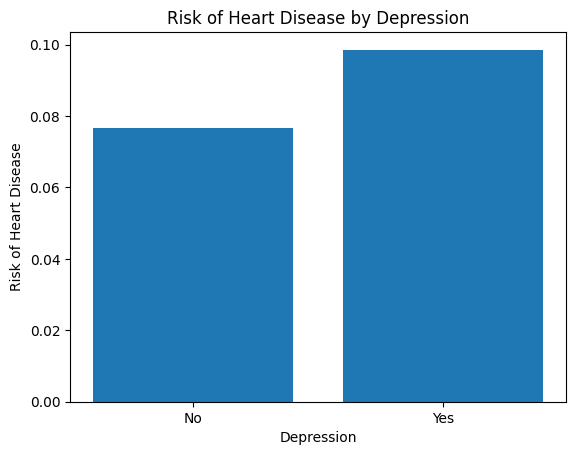

In [36]:
depression_group = data_without_duplicates.groupby('Depression')
risk_by_depression = depression_group['Cardio_Disease'].mean()

depression_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(depression_group_names.values(), risk_by_depression.values)
plt.xlabel('Depression')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Depression')
plt.xticks(rotation=0)
plt.show()

## The chances of having Cardiovascular diseases according to their Smoking History

In [37]:
data_count['Smoking_History'] = data_count['Smoking_History'].replace({
     0: "No",
    1: "Yes"
})

smoking_count = data_count['Smoking_History'].value_counts().sort_values()
print('Number of People According to their Smoking_History (Sorted)')
smoking_count

Number of People According to their Smoking_History (Sorted)


Smoking_History
Yes    125158
No     182912
Name: count, dtype: int64

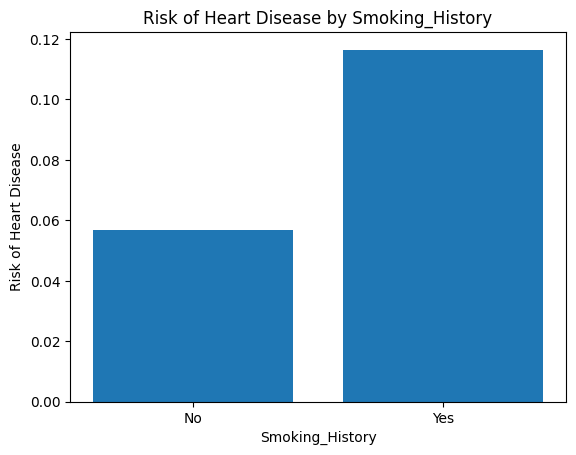

In [39]:
smoking_group = data_without_duplicates.groupby('Smoking_History')
risk_by_smoking = smoking_group['Cardio_Disease'].mean()

smoking_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(smoking_group_names.values(), risk_by_smoking.values)
plt.xlabel('Smoking_History')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Smoking_History')
plt.xticks(rotation=0)
plt.show()

## The chances of having Cardiovascular diseases according to their Diabetes

In [40]:
data_count['Diabetes'] = data_count['Diabetes'].replace({
     0: "No",
     1: "No, pre-diabetes or borderline diabetes",
     2: "Yes",
     3: "Yes, but female told only during pregnancy"
})

diabetes_count = data_count['Diabetes'].value_counts().sort_values()
print('Number of People According to their Diabetes (Sorted)')
diabetes_count

Number of People According to their Diabetes (Sorted)


Diabetes
Yes, but female told only during pregnancy      2646
No, pre-diabetes or borderline diabetes         6896
Yes                                            40160
No                                            258368
Name: count, dtype: int64

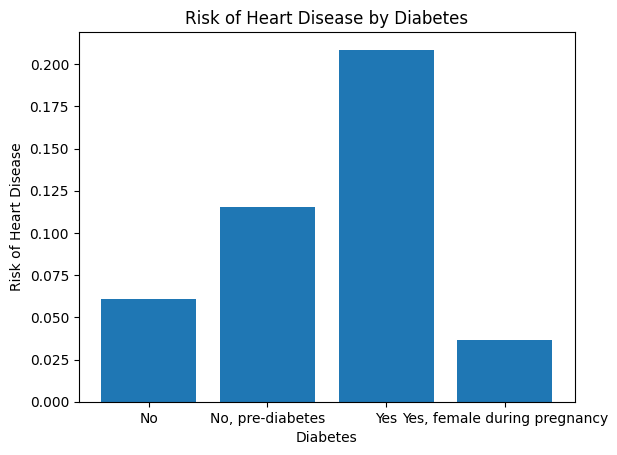

In [41]:
diabetes_group = data_without_duplicates.groupby('Diabetes')
risk_by_diabetes = diabetes_group['Cardio_Disease'].mean()

diabetes_group_names = {
    0: "No",
     1: "No, pre-diabetes", # No, pre-diabetes or borderline diabetes AS No, pre-diabetes
     2: "Yes",
     3: "Yes, female during pregnancy" # Yes, but female told only during pregnancy AS Yes, female during pregnancy
}
plt.bar(diabetes_group_names.values(), risk_by_diabetes.values)
plt.xlabel('Diabetes')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Diabetes')
plt.xticks(rotation=0)
plt.show()